In [13]:
#Importación de librerias
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Importación de datos
data = np.loadtxt('din1.txt')

# Recolección de datos. Almacenamos los datos de masa, área y sus incertidumbres en vectores
time = data[:,0]
x = data[:,1]
v = data[1:43,2]
time_v = data[1:43,0]

In [15]:
# Sacando datos de la función de ajuste
time_ajuste = np.linspace(0,time[-1],500)

A=1.212
B=0.08623
C=-0.002934

A1 = 2.4230
B1 = 0.0786

x_ajuste = A*time_ajuste**2 + B*time_ajuste + C
v_ajuste = A1*time_ajuste + B1*time_ajuste

In [16]:
# Curva teórica
g = 9.8
theta = 35*np.pi/180
u_k = 0.38509

time_teoria = np.linspace(0,time[-1],500)
x_teoria = 1/2*g*(np.sin(theta)-u_k*np.cos(theta))*time_teoria**2
v_teoria = g*(np.sin(theta)-u_k*np.cos(theta))*time_teoria

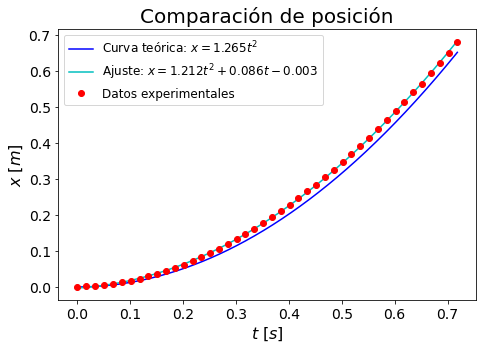

In [17]:
plt.figure(figsize=(7.5, 5))
plt.plot(time_teoria ,x_teoria,'b',label='Curva teórica: $x = %.3ft^2$'%(1/2*g*(np.sin(theta)-u_k*np.cos(theta))))
plt.plot(time_ajuste,x_ajuste,'c',label='Ajuste: $x = %.3ft^2+ %.3ft %.3f$'%(A,B,C))
plt.plot(time,x,'or',label='Datos experimentales')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Comparación de posición', fontsize = 20)
plt.legend(fontsize = 12, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$x$ [$m$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('grafica_x_din1.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

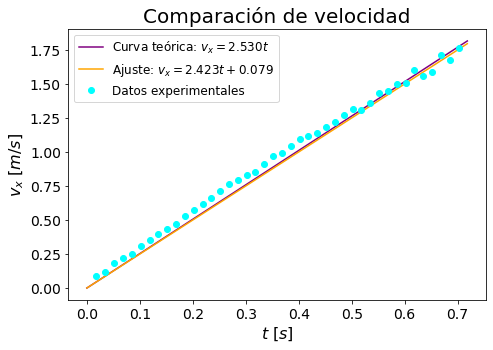

In [18]:
plt.figure(figsize=(7.5, 5))
plt.plot(time_teoria ,v_teoria,'purple',label='Curva teórica: $v_{x} = %.3f t$'%(g*(np.sin(theta)-u_k*np.cos(theta))))
plt.plot(time_ajuste,v_ajuste,'orange',label='Ajuste: $v_{x} = %.3ft+ %.3f$'%(A1,B1))
plt.plot(time_v,v,'o', color='cyan',label='Datos experimentales')

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Comparación de velocidad', fontsize = 20)
plt.legend(fontsize = 12, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$v_{x}$ [$m/s$]', fontsize = 16)
plt.xlabel('$t$ [$s$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('grafica_vx_din1.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos

In [19]:
# Encontrando la desviación estándar de las diferencias entre el modelo teórico (ecuaciones teóricas) y experimental (ecuaciones de ajuste)

# Se calculan los valores de teoricos 'xt' y 'vt' y los experimentales 'xe' y 've'
xt = 1/2*g*(np.sin(theta)-u_k*np.cos(theta))*time**2
xe = A*time**2 + B*time + C
vt = g*(np.sin(theta)-u_k*np.cos(theta))*time_v
ve = A1*time_v + B1

#Se calculan las diferencias entre los puntos de ambos modelos
dx = (xt-xe)
dv = (vt-ve)

#Se calcula el promedio de las diferencias
N = np.size(xt)
prom = np.sum(dx)/N
N1 = np.size(vt)
prom1 = np.sum(dv)/N


# Se calcula la desviación estándar con el valor 'rms' (media cuadrática) y 'prom' (promedio)
rms = np.sum(dx**2)/N
desviacion = np.sqrt(rms-prom**2)
rms1 = np.sum(dv**2)/N1
desviacion1 = np.sqrt(rms1-prom1**2)


print('desviación x = ', desviacion)
print('desviación vx = ', desviacion1)

desviación x =  0.010434724189940028
desviación vx =  0.024669056432295


In [22]:
# Calibración del método del cálculo de la desviación para la curva de ajuste y los datos

# Se calculan los valores de x del ajust 'xa' y experimentales 'xe'
xa = A*time**2 + B*time + C
xe = x

#Se calculan las diferencias entre los puntos de ambos modelos
dx = (xa-xe) #Diferencias

#Se calcula el promedio de las diferencias
N = np.size(x)
prom = np.sum(dx)/N

# Se calcula la desviación estándar con el valor 'rms' (media cuadrática) y 'prom' (promedio)
rms = np.sum(dx**2)/N
desviacion = np.sqrt(rms-prom**2)

# Desviación reportada por Tracker
desviación_tracker = 1.624e-3

print('Desviación\n')
print('jupyter = ', desviacion)
print('tracker = ', desviación_tracker)

Desviación

jupyter =  0.001623877202981604
tracker =  0.001624
